# 8. час: Табеларно представљени подаци

На овом часу ћемо говорити о:
1. представљању табеларно задатих података помоћу листи у Пајтону,
2. ефикаснијем представљању табеларних података користећи библиотеку _pandas_, и
3. визуелизацији табеларно представљених података.

## 8.1. Представљање табеларно задатих података помоћу листи

Најчешћи начин да организујемо велике количине података је да их представимо табелом. Рецимо, ова табела садржи податке о једној групи деце (при чему је, наравно, старост изражена у годинама, тежина у килограмима, а висина у центиметрима):

| __Име__ | __Пол__ | __Старост__ | __Тежина__ | __Висина__ |
|---|---|---|---|---|
|      Ана | ж | 13 | 46 | 160 |
|    Бојан | м | 14 | 52 | 165 |
|    Влада | м | 13 | 47 | 157 |
|  Гордана | ж | 15 | 54 | 165 |
|    Дејан | м | 15 | 56 | 163 |
|    Ђорђе | м | 13 | 45 | 159 |
|    Елена | ж | 14 | 49 | 161 |
|  Жаклина | ж | 15 | 52 | 164 |
|    Зоран | м | 15 | 57 | 167 |
|    Ивана | ж | 13 | 45 | 158 |
|    Јасна | ж | 14 | 51 | 162 |

Да бисмо могли машински да обрађујемо и анализирамо податке, прво их морамо представити у облику неке структуре података. Један једноставан начин да се то уради је да сваки ред табеле представимо једном листом, и да потом све те листе запакујемо у једну велику листу, рецимо овако:

In [1]:
podaci = [["Ана",     "ж", 13, 46, 160],
          ["Бојан",   "м", 14, 52, 165],
          ["Влада",   "м", 13, 47, 157],
          ["Гордана", "ж", 15, 54, 165],
          ["Дејан",   "м", 15, 56, 163],
          ["Ђорђе",   "м", 13, 45, 159],
          ["Елена",   "ж", 14, 49, 161],
          ["Жаклина", "ж", 15, 52, 164],
          ["Зоран",   "м", 15, 57, 167],
          ["Ивана",   "ж", 13, 45, 158],
          ["Јасна",   "ж", 14, 51, 162]]

Из овако представљених података лако можемо добити податке о сваком појединачном детету у групи. Рецимо, податке о Дејану добијамо тако што испишемо елемент листе са индексом 4 (_Пажња! Први елемент листе има индекс 0, зато подаци о Дејану који су наведени у 5. реду табеле имају индекс 4_):

In [2]:
podaci[4]

['Дејан', 'м', 15, 56, 163]

Овај начин представљања података, међутим, није погодан за обраде по колонама. Рецимо, ако желимо да израчунамо просечну висину деце у групи морамо да пишемо програм. То није немогуће, чак није ни тешко, али је непрактично. Ево програма:

In [3]:
sum = 0
for dete in podaci:
    sum += dete[4]
float(sum) / len(podaci)

161.9090909090909

Програм ради на следећи начин:

* прво помоћну променљиву `sum` поставимо на нулу (у њој ће се полако акумулирати збир висина све деце у групи);
* након тога циклус `for dete in podaci:` прође кроз свако дете у групи (јер сваки елемент листе `podaci` представља податке о једном детету) и на суму дода његову висину (висина детета се налази на петом месту у групи података за то дете, а то је елемент листе са индексом 4);
* коначно, добијени збир поделимо бројем података да бисмо израчунали просек.

Као што смо већ рекли, ово није јако тешко, али је непрактично. Треба нам флексибилнија структура података.

## 8.2. Библиотека _pandas_, структура података _DataFrame_ и рад са колонама табеле

За ефикасно манипулисање табеларно представљеним подацима у Пајтону развијена је библиотека _pandas_. Њу можемо увести као што смо увозили и остале библиотеке (и уз пут ћемо јој дати надимак да бисмо мање морали да куцамо):

In [4]:
import pandas as pd

Из ове библиотеке ћемо користити структуру података која се зове _DataFrame_ (енгл. _data_ значи "подаци", _frame_ значи "оквир", тако да _DataFrame_ значи "оквир са подацима", односно "табела").

Податке о деци сада лако можемо да препакујемо у _DataFrame_ позивом функције са истим именом:

In [5]:
tabela = pd.DataFrame(podaci)

Претходна команда није дала никакав излаз. Она је просто препаковала податке наведене у листи `podaci` у нову структуру података. Да бисмо се уверили да се ради само о препакивању, исписаћемо садржај променљиве `tabela`:

In [6]:
tabela

,0,1,2,3,4
0,Ана,ж,13,46,160
1,Бојан,м,14,52,165
2,Влада,м,13,47,157
3,Гордана,ж,15,54,165
4,Дејан,м,15,56,163
5,Ђорђе,м,13,45,159
6,Елена,ж,14,49,161
7,Жаклина,ж,15,52,164
8,Зоран,м,15,57,167
9,Ивана,ж,13,45,158


Да би табела била прегледнија, даћемо колонама име. Колонама се име даје приликом препакивања, тако што се листа са именима колона проследи помоћном параметру `columns`:

In [7]:
tabela = pd.DataFrame(podaci)
tabela.columns=["Име", "Пол", "Старост", "Тежина", "Висина"]
tabela

,Име,Пол,Старост,Тежина,Висина
0,Ана,ж,13,46,160
1,Бојан,м,14,52,165
2,Влада,м,13,47,157
3,Гордана,ж,15,54,165
4,Дејан,м,15,56,163
5,Ђорђе,м,13,45,159
6,Елена,ж,14,49,161
7,Жаклина,ж,15,52,164
8,Зоран,м,15,57,167
9,Ивана,ж,13,45,158


Када свака колона има своје име, можемо да приступимо појединачним колонама:

In [8]:
tabela["Име"]

0         Ана
1       Бојан
2       Влада
3     Гордана
4       Дејан
5       Ђорђе
6       Елена
7     Жаклина
8       Зоран
9       Ивана
10      Јасна
Name: Име, dtype: object

In [9]:
tabela["Висина"]

0     160
1     165
2     157
3     165
4     163
5     159
6     161
7     164
8     167
9     158
10    162
Name: Висина, dtype: int64

Имена свих колона су увек доступна у облику листе овако:

In [10]:
tabela.columns

Index(['Име', 'Пол', 'Старост', 'Тежина', 'Висина'], dtype='object')

Позивом једне од следећих функција лако можемо да вршимо elementarnu анализу података који су представљени табелом:
* `sum` -- рачуна збир елемената у колони (сума);
* `mean` -- рачуна просек елемената у колони (аритметичка средина се на енглеском каже _arithmetic mean_);
* `min` -- рачуна вредност најмањег елемента у колони (минимум);
* `max` -- рачуна вредност највећег елемента у колони (максимум).

На пример, висина најнижег детета у групи је:

In [11]:
tabela["Висина"].min()

157

Најстарије дете у групи има оволико година:

In [12]:
tabela["Старост"].max()

15

Просечна висина деце у групи је:

In [13]:
tabela["Висина"].mean()

161.9090909090909

Да ли цела група може да стане у лифт чија носивост је 600 кг?

In [14]:
if tabela["Тежина"].sum() <= 600:
    print("Могу сви да стану у лифт.")
else:
    print("Не. Заједно су претешки.")

Могу сви да стану у лифт.


## 8.3. Визуелизација табеларно представљених података

Визуелизација података из табеле се своди на то да се одаберу интересантне колоне табеле и прикажу неком од техника које смо раније видели. Прво ћемо учитати одговарајућу библиотеку:

In [15]:
import matplotlib.pyplot as plt

Ако желимо хистограмом да представимо висину деце у групи, одабраћемо колоне "Име" и "Висина" и приказати их, рецимо овако:

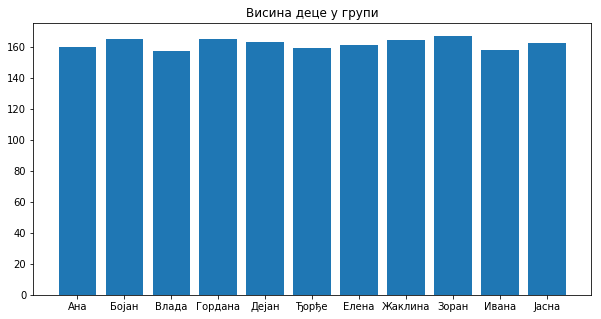

In [16]:
plt.figure(figsize=(10,5))
plt.bar(tabela["Име"], tabela["Висина"])
plt.title("Висина деце у групи")
plt.show()
plt.close()

Као други пример, линијским дијаграмом ћемо представити тежину и старост деце у групи тако да тежина буде представљена црвеном линијом, а старост зеленом. Приказаћемо и легенду да би било јасно шта која линија представља.

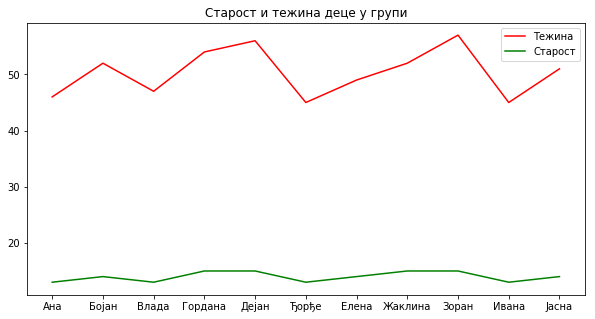

In [17]:
plt.figure(figsize=(10,5))
plt.plot(tabela["Име"], tabela["Тежина"], color="r", label="Тежина")
plt.plot(tabela["Име"], tabela["Старост"], color="g", label="Старост")
plt.title("Старост и тежина деце у групи")
plt.legend()
plt.show()
plt.close()

## 8.4. Задаци

Задатке реши у Џупајтеру.

**Задатак 1.** У следећој листи су дати подаци о националним парковима Србије. За сваки национални парк је наведено његово име, површина у хектарима и година оснивања:

In [1]:
nac_parkovi = [["Фрушка гора", 25393, 1960],
               ["Ђердап",      64000, 1974],
               ["Тара",        22000, 1981],
               ["Копаоник",    11810, 1981],
               ["Шар-планина", 39000, 1985]]

_(а)_ Од ове листе направи _DataFrame_ па израчунај просечну површину националног парка (у хектарима), и укупну површину коју заузимају национални паркови у Србији (у квадратним километрима; 1 квадратни километар = 100 хектара).

_(б)_ Прикажи линијским графиконом површине националних паркова у Србији.

**Задатак 2.** Производња кукуруза и пшенице у периоду 2008-2012. је дата у следећој табели (подаци су исказани у хиљадама тона):

| Година | Кукуруз | Пшеница |
|--|--|--|
| 2008. | 6.158 | 2.095 |
| 2009. | 6.396 | 2.067 |
| 2010. | 7.207 | 1.631 |
| 2011. | 6.480 | 2.076 |
| 2012. | 3.532 | 1.911 |

_(а)_ Направи одговарајући _DataFrame_ па израчунај максималну производњу кукуруза и минималну производњу пшенице у наведеном периоду. (Упутство: податке прво представи листом, а онда од листе направи _DataFrame_.)

_(б)_ На једном графикону прикажи стубичастим дијаграмом производњу пшенице и кукуруза у наведеном периоду. (Води рачуна да прво исцрташ податке за кукуруз, а онда преко тога податке за пшеницу.)

_(в)_ Израчунај просечну годишњу производњу кукуруза за наведени период, као и за колико се разликовала производња пшенице у најбољој и најлошијој години наведеног периода (у хиљадама тона).